In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



In [2]:
data=pd.read_csv('/content/delivery_time.csv')

EDA


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
data.shape

(21, 2)

In [5]:
data.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [6]:
data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [7]:
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [8]:
data=data.rename({'Sorting Time':'st'},axis=1)
data=data.rename({'Delivery Time':'dt'},axis=1)

In [9]:
datwa=data[['st','dt']]

In [10]:
data.head()

,dt,st
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [11]:
data[data.duplicated()]


,dt,st


In [12]:
data.describe()

,dt,st
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


Visualisation


<Axes: >

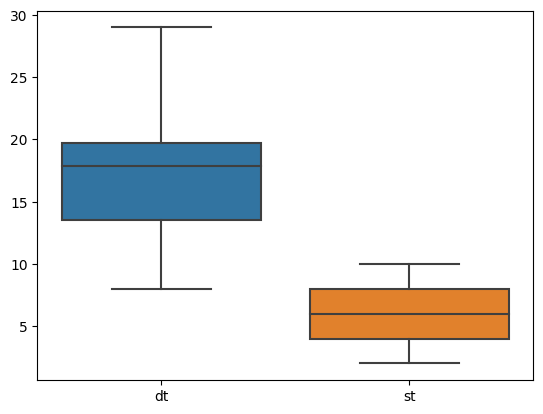

In [13]:
sns.boxplot(data)

<Axes: xlabel='st', ylabel='dt'>

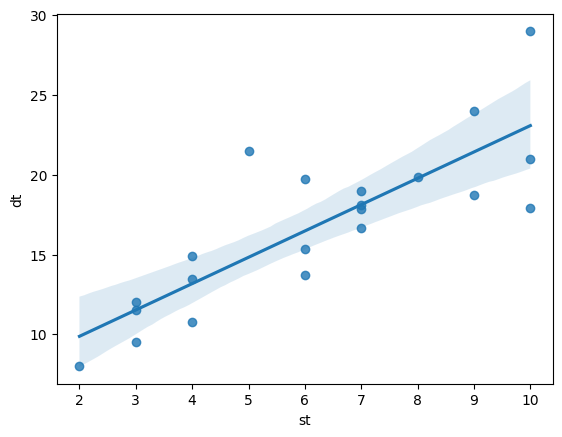

In [14]:
sns.regplot(data,x='st',y='dt')

Correlation

In [15]:
data.corr()

,dt,st
dt,1.000000,0.825997
st,0.825997,1.000000


In [16]:
import statsmodels.formula.api as smf
model=smf.ols('dt ~ st',data).fit()

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dt   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 15 Apr 2023   Prob (F-statistic):           3.98e-06
Time:                        19:58:17   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
st             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Predictiction for new delivery time

In [18]:
newdata=pd.Series([5,11,15])
newdata

0     5
1    11
2    15
dtype: int64

In [19]:
data_pred=pd.DataFrame(newdata,columns=['st'])

In [20]:
model.predict(data_pred)

0    14.827833
1    24.721953
2    31.318032
dtype: float64

In [21]:
data_pred['dt']=model.predict(data_pred)
data_pred

,st,dt
0,5,14.827833
1,11,24.721953
2,15,31.318032


<Axes: xlabel='st', ylabel='dt'>

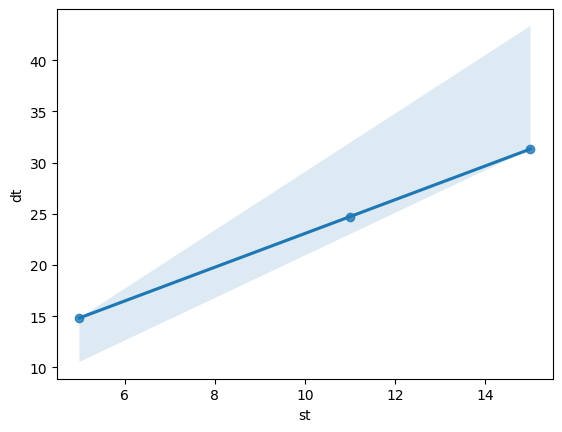

In [22]:
sns.regplot(data=data_pred,x='st',y='dt',)

Building the model by transformation

1.Normalizaton

In [23]:
df1=data
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
df1_scale=pd.DataFrame(ms.fit_transform(df1))
x=df1_scale.iloc[:,-1] 
y=df1_scale.iloc[:,0] 

In [24]:
model=smf.ols('y~x',data=df1_scale).fit()

In [25]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 15 Apr 2023   Prob (F-statistic):           3.98e-06
Time:                        19:58:17   Log-Likelihood:                 12.578
No. Observations:                  21   AIC:                            -21.16
Df Residuals:                      19   BIC:                            -19.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0896      0.060      1.496      0.151      -0.036       0.215
x              0.6282      0.098      6.387      0.000       0.422       0.834
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         4.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

2.Standardization

In [26]:
df2=data
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df2_scale=pd.DataFrame(ss.fit_transform(df2))

In [27]:
x=df1_scale.iloc[:,-1] 
y=df1_scale.iloc[:,0]

In [28]:

model=smf.ols('y~x',data=df1_scale).fit()

In [29]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 15 Apr 2023   Prob (F-statistic):           3.98e-06
Time:                        19:58:17   Log-Likelihood:                 12.578
No. Observations:                  21   AIC:                            -21.16
Df Residuals:                      19   BIC:                            -19.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0896      0.060      1.496      0.151      -0.036       0.215
x              0.6282      0.098      6.387      0.000       0.422       0.834
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         4.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

3.Log Transformation

In [30]:
df2_scale = np.log(df2)
x=df2_scale.iloc[:,-1] 
y=df2_scale.iloc[:,0] 


In [31]:
model=smf.ols("y~x",data=df2_scale).fit()

In [32]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Sat, 15 Apr 2023   Prob (F-statistic):           1.60e-07
Time:                        19:58:18   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7420      0.133     13.086      0.000       1.463       2.021
x              0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

4.Squreroot Transformation

In [33]:
df2_scale = np.sqrt(df2)
x=df2_scale.iloc[:,-1] 
y=df2_scale.iloc[:,0] 

In [34]:
model=smf.ols("y~x",data=df2_scale).fit()


In [35]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     51.16
Date:                Sat, 15 Apr 2023   Prob (F-statistic):           8.48e-07
Time:                        19:58:18   Log-Likelihood:                -5.7320
No. Observations:                  21   AIC:                             15.46
Df Residuals:                      19   BIC:                             17.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6135      0.349      4.628      0.000       0.884       2.343
x              1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
# from above analysis we can see Log transformation give best R2 Score.